# Problem1

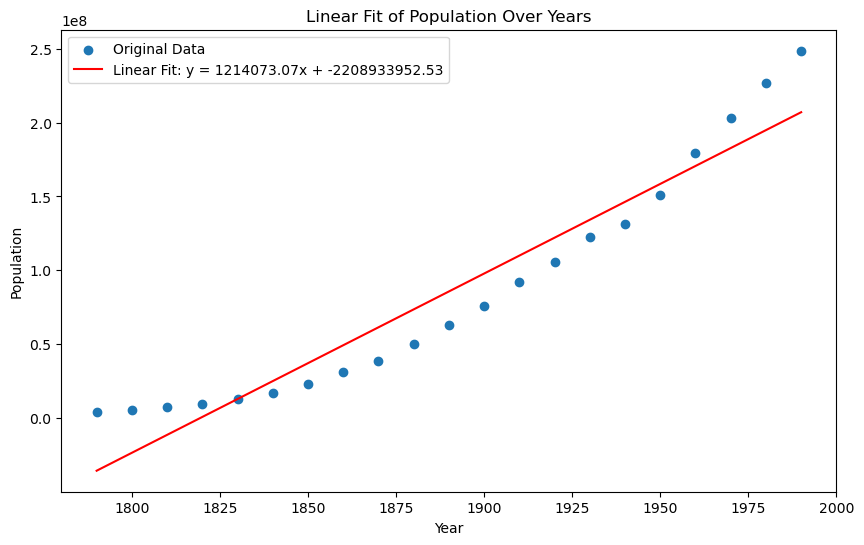

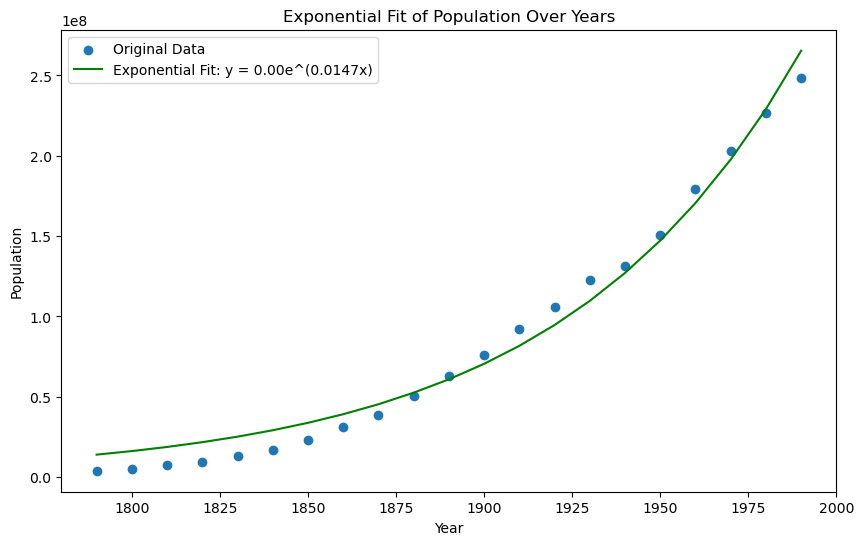

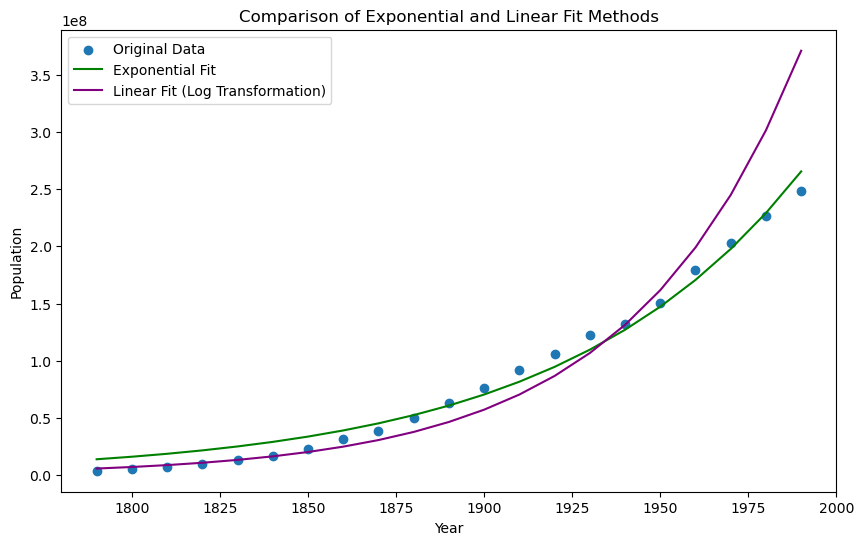

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit

# 1. 用 numpy.loadtxt 函数读入数据，将年份和对应的人口数分别存入 x 和 y 两个变量中。
data = np.loadtxt('uspop.txt')
x, y = data[:, 0], data[:, 1]

# 2. 用线性拟合函数 linregress 拟合人口数随年份变化的曲线，并将拟合结果及原始数据画在同一张图中。
slope, intercept, r_value, p_value, std_err = linregress(x, y)
linear_fit = slope * x + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(x, linear_fit, label=f'Linear Fit: y = {slope:.2f}x + {intercept:.2f}', color='red')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.title('Linear Fit of Population Over Years')
plt.show()

# 3. 用 scipy.optimize.curve_fit 函数拟合人口数随年份变化的曲线，并将拟合结果及原始数据画在同一张图中。
def exponential_fit(x, a, c):
    return a * np.expm1(c * x)

# 归一化数据
x_normalized = x / 1000.0  # 选择适当的归一化因子
y_normalized = y / 1e6    # 选择适当的归一化因子

# 用归一化后的数据进行拟合
popt_normalized, pcov_normalized = curve_fit(exponential_fit, x_normalized, y_normalized)

# 反归一化拟合结果
a_normalized, c_normalized = popt_normalized
a = a_normalized * 1e6  # 反归一化因子
c = c_normalized / 1000.0  # 反归一化因子

# 计算拟合值
exponential_fit_values = exponential_fit(x, a, c)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(x, exponential_fit_values, label=f'Exponential Fit: y = {a:.2f}e^({c:.4f}x)', color='green')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.title('Exponential Fit of Population Over Years')
plt.show()

# 4. 将曲线拟合问题通过公式变换转为线性拟合问题重新拟合，并比较两种拟合方法的结果是否一致。
# Logarithmic transformation: y = log(a) + cx
log_y = np.log(y)
slope_log, intercept_log, r_value_log, p_value_log, std_err_log = linregress(x, log_y)
exponential_fit_linear_transform = np.exp(intercept_log) * np.exp(slope_log * x)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(x, exponential_fit_values, label='Exponential Fit', color='green')
plt.plot(x, exponential_fit_linear_transform, label='Linear Fit (Log Transformation)', color='purple')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.title('Comparison of Exponential and Linear Fit Methods')
plt.show()
